In [ ]:
# Code to read the csv files
import matplotlib.pyplot as plt
import pandas as pd
r = pd.read_csv( '/content/ratings.csv' )
tr = pd.read_csv( '/content/to_read.csv' )
b = pd.read_csv( '/content/books.csv' )
t = pd.read_csv( '/content/tags.csv' )
bt = pd.read_csv( '/content/book_tags.csv')

**Top 7 languages in which books are writtern**

language_code
eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
Name: language_code, dtype: int64


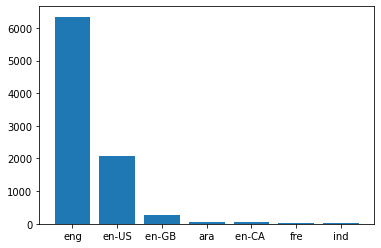

In [ ]:
lan = b.groupby( 'language_code' ).language_code.count().sort_values( ascending = False )
print(lan.head(7))
c=[6341,2070,257,64,58,25,21]
l=['eng','en-US','en-GB ','ara','en-CA ','fre','ind']
fig,ax=plt.subplots()
ax.bar(l,c)
plt.xlabel=('Language')
plt.ylabel=('Number of books written in that language')
plt.show()

**Top 10 authors who published maximum number of books**

In [ ]:
bp = b.groupby( 'authors' ).authors.count().sort_values( ascending = False )
print(bp.head(10))

authors
Stephen King       60
Nora Roberts       59
Dean Koontz        47
Terry Pratchett    42
Agatha Christie    39
Meg Cabot          37
James Patterson    36
David Baldacci     34
John Grisham       33
J.D. Robb          33
Name: authors, dtype: int64


**Which rating is given by most of people?**

---


**What is the probabilty of that rating to occur?** 

rating
4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: rating, dtype: int64


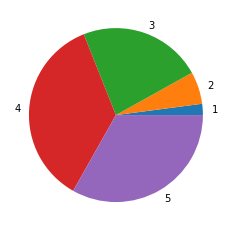

In [ ]:
rate = r.groupby( 'rating' ).rating.count().sort_values( ascending = False )
print(rate.head())
r=[1,2,3,4,5]
n=[124195,359257,1370916,2139018,1983093]
fig = plt.figure()
plt.pie(n, labels = r)
plt.show()


In [ ]:
s=0
for i in n:
  s=s+i
print('The most common rating is',4)
print('Probaility of getting rating 4 is:',n[3]/s)

The most common rating is 4
Probaility of getting rating 4 is: 0.35790605137238835


**Pie chart to show top 10 type of books people have**


---


**What is the probabilty that a person picks a book of to-read or to-buy**

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
Name: tag_name, dtype: int64


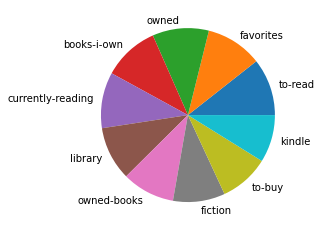

Probability that book chosen is to-read or to buy is: 0.018676624866363373


In [ ]:
bt = bt.merge( t, on = 'tag_id' )
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
print(tag_counts.head(10))
t=['to-read','favorites','owned','books-i-own','currently-reading','library','owned-books','fiction','to-buy','kindle']
no=[9983,9881,9858,9799,9776,9415,9221,9097,8692,8316]
fig = plt.figure()
plt.pie(no, labels = t)
plt.show()
print('Probability that book chosen is to-read or to buy is:',(no[0]+no[-2])/999913)

**Top 21 user id who read maximum number of books**


---

**Probability that a person chosen from these 21 has read same number as other one given that they have read books less than 100**


In [ ]:
read = tr.groupby( 'user_id' ).user_id.count().sort_values( ascending = False )
print(read.head(21))
# out of 21 -> 3 has read 102 books, 2 has read 100 books, 2 has read 99 books, 4 has read 97 books
# we have to find probability of person who has read less than 100 books and has read the same number of books as the other one
p100less=7/21
pmorethan1=13/21
pboth=6/21
preq=pboth/p100less
print('probability of person who has read less than 100 books and has read the same number of books as the other one is:',preq)

user_id
38457    117
28259    114
38076    110
44530    108
46000    107
46555    107
34162    105
34487    104
39174    103
24784    102
40362    102
47363    102
44389    100
48339    100
25952     99
11924     99
17716     97
36428     97
19246     97
46331     97
31631     96
Name: user_id, dtype: int64
probability of person who has read less than 100 books and has read the same number of books as the other one is: 0.8571428571428571


**Showing the id and author of books having the highest avg.rating**


---
Printing the name of the authors of these books


In [15]:
t= b.average_rating.sort_values(ascending=False)
print(t.head(5))
fre=[4.82,4.77,4.77,4.76,4.76]
a=['Bill Watterson','Brandon Sanderson','J.K. Rowling, Mary GrandPrÃ©','Anonymous, Lane T. Dennis, Wayne A. Grudem','Francine Rivers']
for i in range(len(a)):
  print('Rating:',fre[i],'Author is:',a[i])

3627    4.82
3274    4.77
861     4.77
8853    4.76
7946    4.76
Name: average_rating, dtype: float64
Rating: 4.82 Author is: Bill Watterson
Rating: 4.77 Author is: Brandon Sanderson
Rating: 4.77 Author is: J.K. Rowling, Mary GrandPrÃ©
Rating: 4.76 Author is: Anonymous, Lane T. Dennis, Wayne A. Grudem
Rating: 4.76 Author is: Francine Rivers
